## Importing stuffs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd

## Write a program which counts the Yokoi connectivity number on a downsampled image(lena.bmp).

#### Downsampling Lena from 512x512 to 64x64: 
* Binarize the benchmark image lena as in HW2, then using 8x8 blocks as a unit, take the topmost-left pixel as the downsampled data.
* Count the Yokoi connectivity number on a downsampled lena using 4-connected.
* Result of this assignment is a 64x64 matrix.
* You can use any programing language to implement homework, however, you'll get zero point if you just call existing library.


### Importing image and binarizing

In [2]:
lena=cv2.imread('lena.bmp')

In [3]:
bi_img = np.array([[[ 0 if lena[i, j, c] < 128 else 1 for c in range(lena.shape[2])] 
                           for j in range(int(lena.shape[1]))] 
                           for i in range(int(lena.shape[0]))], dtype='uint8')

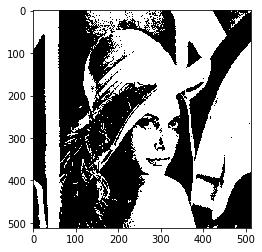

In [5]:
plt.imshow(bi_img*255)

### Downsampling

In [14]:
def downsampling(img,size):
    H=img.shape[0]
    W=img.shape[1]
    new_H=int(H/size[0])
    new_W=int(W/size[1])
    new_img=np.zeros((new_H,new_W), dtype=np.int)
    
    for i in range(new_H):
        for j in range(new_W):
            new_img[i,j]=img[i*size[0]][j*size[1]][0]
            
    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
    return re_img

In [15]:
small_img=downsampling(bi_img,(8,8))

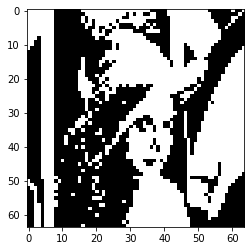

In [19]:
plt.imshow(small_img*255)

In [48]:
cv2.imwrite('HW6-1.jpg',small_img*255)

True

### Yokoi connectivity number

In [38]:
def h_fun(b,c,d,e):
    if(b==c and (d!=b or e != b)):
        return 1
    elif(b!=c):
        return 10
    else:
        return 0

In [41]:
def Yokoi(img):
    H=img.shape[0]
    W=img.shape[1]
    new_img=np.zeros((H+2,W+2), dtype=np.int)
    label_img=np.zeros((H,W), dtype=np.int)
    for i in range(H):
        for j in range(W):
            new_img[i+1][j+1]=small_img[i][j][0]
    
    for i in range(H):
        for j in range(W):
            
            x0=new_img[i,j]
            if(x0==1):
                x1=new_img[i,j+1]
                x2=new_img[i-1,j]
                x3=new_img[i,j-1]
                x4=new_img[i+1,j]
                x5=new_img[i+1,j+1]
                x6=new_img[i-1,j+1]
                x7=new_img[i-1,j-1]
                x8=new_img[i+1,j-1]
                label=0
                label=h_fun(x0,x1,x6,x2)+h_fun(x0,x2,x7,x3)+h_fun(x0,x3,x8,x4)+h_fun(x0,x4,x5,x1)
                re=label%10
                if(label==40):
                    label_img[i,j]=0
                else:
                    if (re==0):
                        label_img[i,j]=5
                    else:
                        label_img[i,j]=re
            
    return label_img

In [49]:
Yokoi_img=Yokoi(small_img)

In [56]:
def print_label(arr):
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if(arr[i,j]==0):
                print(" ",end='')
            else:
                print(arr[i,j],end='')
        print()

In [57]:
print_label(Yokoi_img)

                                                                
 11111111        12111111111122322221     111111111111          
 15555551         115555555511 2 11  11   1155555555511         
 15555551        1 2115555112  21112221    155555555551      21 
 15555551        1 2 155112 22221511       1555555555511     1  
 15555551         22 2112 22    121        15555555555511       
 15555551         1  2  21 2     1   1     15555555555551       
 15555551           12 1  121111    1321   155555555555511      
 15111551           1322 1155551111        155555555555551      
 111 1551            1  121555555511       155555555555511      
 11  1551                 21155555511      15511155555511       
 21  1551                 2 15555555111    1551 11555511        
 1   1551                 2 155555555511   1551  115551         
     1551               1121155555555551   1551   15511        1
     1551               15555555555555511  1551   1111        11
     1551        1     22